In [87]:
import warnings
warnings.filterwarnings("ignore")

## 1. Importing necessary libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Import dataset

In [54]:
claimants_data = pd.read_csv('claimants.csv')
claimants_data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


## 3. Initial Investigation

In [55]:
claimants_data.shape

(1340, 7)

In [56]:
claimants_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [57]:
claimants_data.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

## 4. Data Preprocessing/Data Preparation

In [58]:
claimants_data.head(50)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


In [59]:
del claimants_data['CASENUM']

In [60]:
claimants_data

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [61]:
claimants_data.dropna(axis=0,inplace=True)

In [62]:
claimants_data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [63]:
claimants_data.dtypes

ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

## 5. Model Building

In [64]:
X = claimants_data.iloc[:,1:]
y = claimants_data[['ATTORNEY']]

In [65]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [66]:
y

,ATTORNEY
0,0
1,1
2,1
3,0
4,1
...,...
1334,1
1336,0
1337,1
1338,0


In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 123,test_size = 0.20)

In [68]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(876, 5)
(876, 1)
(220, 5)
(220, 1)


## 6. Model Training

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
#Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

#Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini')
dt_model.fit(X_train,y_train)


#Random Forest Classifer
rf_model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=None,min_samples_split=2)
rf_model.fit(X_train,y_train)

#Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train,y_train)


GradientBoostingClassifier()

## 7. Model Testing

#### 7.1 Training data

In [71]:
y_pred_train_data = dt_model.predict(X_train) # Train accuracy

#### 7.2 Test data

In [72]:
y_pred = dt_model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0],
      dtype=int64)

## 8. Model Evaluation Metrics

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [74]:
print(confusion_matrix(y_train,y_pred_train_data))

[[466   0]
 [  3 407]]


In [75]:
print(classification_report(y_train,y_pred_train_data))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       466
           1       1.00      0.99      1.00       410

    accuracy                           1.00       876
   macro avg       1.00      1.00      1.00       876
weighted avg       1.00      1.00      1.00       876



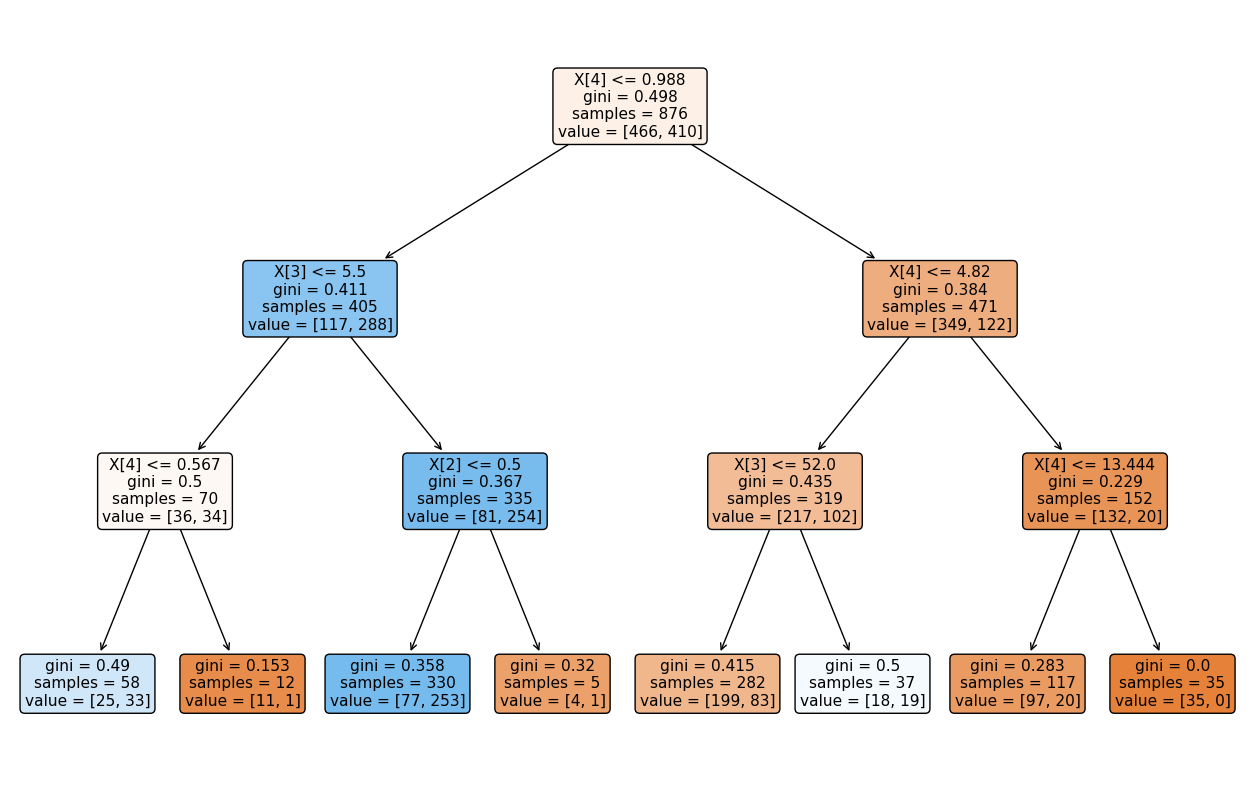

In [77]:
# Apply the decision tree classifier model to the data using all four parameters at once, but with a maximum tree depth of 3
model_all_params_max_depth_3 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model_all_params_max_depth_3,
          rounded = True,
          filled = True                )
# Display the tree plot figure.
plt.show()

In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, dt_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train, y_pred_train_data)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

0.9963414634146341


Text(0, 0.5, 'True Positive Rate')

In [79]:
#train accuracy - 71%
#Test accuracy - 69%

## 9. Dumping python codes into Binary files - Serialization

In [80]:
# from pickle import dump

In [81]:
# dump(log_model,open('claimants_model.pkl','wb'))

In [82]:
# from pickle import load

In [83]:
# loaded_log_model = load(open('claimants_model.pkl','rb'))

In [84]:
# loaded_log_model.score(X_test,y_test)